# Week 4 Notebook – Predicting Early Mortgage Delinquency

### Peer Review Note

Hi peers,

This notebook walks through my Week 4 exploration of the Home Credit dataset as part of my capstone project on predicting early mortgage delinquency.

### Key steps
- Cleaning and preparing the dataset, including dropping high-null columns and non-numeric features.
- Handling class imbalance with class_weight='balanced' in logistic regression.
- Using StandardScaler to standardize numeric features before modeling.
- Evaluating model performance using a confusion matrix, classification report, and accuracy score.
- Visualizing class imbalance and model performance using graphs.

### Key Insight:
The default rate in the dataset was low (~6.6%), and the unbalanced model ignored most defaults. Using class_weight='balanced' significantly improved the model by focusing on the minority class, catching 70% of actual defaults. This highlights how important it is to handle imbalanced data properly.

**Dataset:** [Home Credit Default Risk Dataset on Kaggle](https://www.kaggle.com/competitions/home-credit-default-risk/data)

I welcome any feedback in general and would specifically appreciate feedback on:
- Alternative ways to handle class imbalance
- Suggestions for simplifying or improving the visuals
- Any ideas for additional feature engineering or model improvement
- Any other suggestions/ideas

Thanks in advance for your review!

## Assignment

Week 4 Jupyter Notebook — Logistic Regression and Feature Scaling
Each week, you will apply the concepts of that week to your Integrated Capstone Project’s dataset. In preparation for Milestone One, create a Jupyter Notebook (similar to in Module B, semester two) that illustrates these lessons. There are no specific questions to answer in your Jupyter Notebook files in this course; your general goal is to analyze your data using the methods you have learned about in this course and in this program and draw interesting conclusions. 

For Week 4, include concepts such as logistic regression and feature scaling. This homework should be submitted for peer review in the assignment titled 4.3 Peer Review: Week 4 Jupyter Notebook.

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


In [106]:
#load/review data 
df = pd.read_csv('application_train.csv')
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
#review data 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [108]:
#review data 
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [109]:
#review data 
df.shape

(307511, 122)

In [110]:
#review data 
df.describe

<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      

In [111]:
#review data for missing values
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]


COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64

In [112]:
### DROP MISSING DATA 
#dropping columns that are more than 40% empty/blank. 
#another option is to fill in the missing data; I chose to drop the columns instead. 

#drop columns with more than 60% missing values; so we will only keep columns with at least 40% of rows filled in
threshold = 0.4 * len(df)

#drop columns with too many missing values
df_clean = df.dropna(thresh=threshold, axis=1)

#cofirm # of remaining columns
df_clean.shape


(307511, 105)

In [113]:
#drop rows with any remaining missing values
df_clean = df_clean.dropna()

#compare the shape again before and after to see how much data we have left
df_clean.shape


(31365, 105)

In [114]:
### SELECT FEATURES/TARGET
#separate features-X and target-y
X = df_clean.drop('TARGET', axis=1)
y = df_clean['TARGET']

#keep only # columns in X (ran into issues when tring to scale data due to strings in the data)
X = X.select_dtypes(include=['number'])


# Check shapes
X.shape, y.shape


((31365, 89), (31365,))

In [115]:
#split 70% training vs. 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21955, 89), (9410, 89), (21955,), (9410,))

In [116]:
### FEATUYRE SCALING/STANDARDIZING
#use scaler, fit to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#update test data using the same scaler
X_test_scaled = scaler.transform(X_test)

#shape of scaled data
X_train_scaled.shape, X_test_scaled.shape

((21955, 89), (9410, 89))

In [117]:
#set up model and train
lr = LogisticRegression(max_iter=1000)

#fit the model to training data
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [118]:
#make predictions and print output
y_pred = lr.predict(X_test_scaled)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nAccuracy #:", accuracy_score(y_test, y_pred))


Confusion matrix:
 [[8787    0]
 [ 620    3]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      8787
           1       1.00      0.00      0.01       623

    accuracy                           0.93      9410
   macro avg       0.97      0.50      0.49      9410
weighted avg       0.94      0.93      0.90      9410


Accuracy #: 0.9341126461211477


### Analysis

The classification report supports that the data is imbalanced, which was also indicated in the previous assignment. This makes sense because more peoiple repay loans compared to defaulting. 

Per confusion matrix:
- 8787 correct predictions for class 0 (no default)
- Only 3 correct predictions for class 1 (default)... the model has a precision of 1, so the three it caught was correct, but missed a lot.
- 620 defaults were missed entirely (model identified 3 only).

The model is trying to predict 0 since it gives a high accuracy count, but doesn't help us since we are trying to identify defaults. 
Due to this, we will need to pay more attention to class 1/default and retrain. 



In [119]:
#balance data and populate imbalance (to show percentage of defaults vs. not)
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
y.value_counts(normalize=True)



TARGET
0    0.93378
1    0.06622
Name: proportion, dtype: float64

In [120]:
# Retrain 
#recreate logistic regression model w/balanced class weights
lr_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')

#retrain model
lr_balanced.fit(X_train_scaled, y_train)

#predict on test set again
y_pred_balanced = lr_balanced.predict(X_test_scaled)

#eval performance
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("\nClassification report:\n", classification_report(y_test, y_pred_balanced))
print("\nAccuracy #:", accuracy_score(y_test, y_pred_balanced))


Confusion matrix:
 [[6078 2709]
 [ 190  433]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.69      0.81      8787
           1       0.14      0.70      0.23       623

    accuracy                           0.69      9410
   macro avg       0.55      0.69      0.52      9410
weighted avg       0.91      0.69      0.77      9410


Accuracy #: 0.69192348565356


### Analysis 

We identified that the data was imbalanced. Due to this, we ran the training logistic regression with class_weight='balanced' and the model correctly identified almost 70% of defaulting loan applications versus 0% before we reweighted the data. The adjustment decreases accuracy, as represented by the precision decreasing from 1.0 to 0.97, however, the model has significantly improved and is more useful when trying to preduct laon defaults, which are a rare event. 

See the graphs below to visualize how imbalanced the TARGET column is (this is because most applicants do not default on their loans and supports that we need class weighting)

## Visualizing Model Results


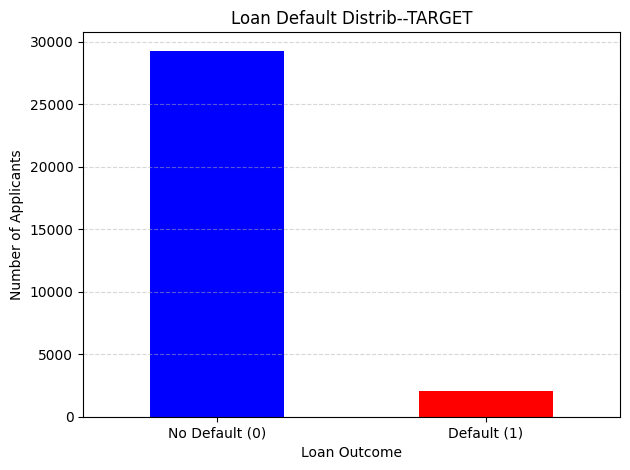

In [121]:
#bar chart of TARGET distrib -- shows how imbalanced data is
y.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Loan Default Distrib--TARGET')
plt.xticks([0, 1], ['No Default (0)', 'Default (1)'], rotation=0)
plt.ylabel('Number of Applicants')
plt.xlabel('Loan Outcome')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


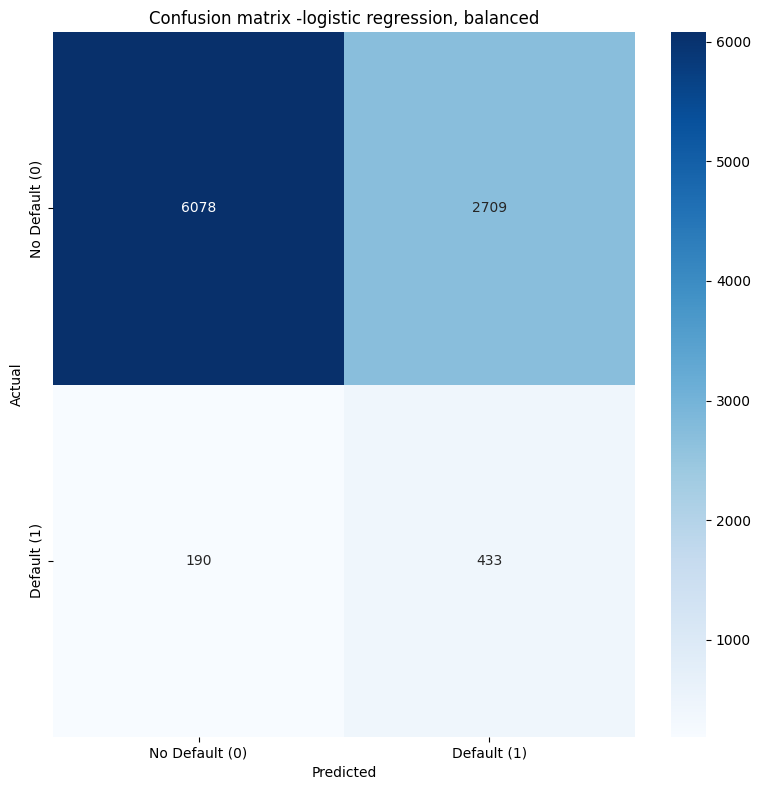

In [122]:
#Confusion matrix -- after balancing 
#set up confusion matrix
cm = confusion_matrix(y_test, y_pred_balanced)

#plot
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix -logistic regression, balanced')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Default (0)', 'Default (1)'])
plt.yticks([0.5, 1.5], ['No Default (0)', 'Default (1)'])
plt.tight_layout()

# Conclusion 

I applied logistic regression and features scaling to preduct the likelihood of a loan defaulting using the application_train.csv dataset. 

- The dataset has a strong class imbalance since over 93% of applicants did not default and only 7% did default. This imbalance resulted in the first logisitic regression model to have a high overall accuracy, but failed to identify most defaults. 
- Due to the imbalance, I used class_weight='balanced' in logistic regression, resulting in a significant improvement in the model --- it was able to accurately identify 70% of the applicants that may default. The overall accuracy declined slightly, but is more helpful in the real-world for underwriting or credit predicution since we focused on the minority class of those that did default. 
- Completed feature scaling with StandardScaler; this was required to ensure that all numeric features were on the same scale. 
- Added visualizations (target distriburtion and confusion matrix) to illustrate how the dataset was broken down and imbalanced.  